In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import explore

from math import sqrt

# hypothesis testing
from scipy import stats

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans

seed = 21

In [2]:
df = acquire.get_wine()
df = explore.add_exploration_columns(df)

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,acid_alc_sugar,acid_chlor
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0.172429,56.518519
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0.416817,47.210884
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0.344314,58.533333
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0.280797,44.540230
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0.280797,44.540230


### There are 2339 rows with outliers out of a total of 6497 rows, for now we will keep outliers

In [4]:
train, X_train, y_train, X_val, y_val, X_test, y_test = explore.split_data(df,'quality')

In [46]:
X_train_s,X_val_s,X_test_s = explore.scale_minmax(X_train,X_val,X_test)

In [6]:
X_train_s.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,acid_alc_sugar,acid_chlor
540,0.239669,0.153333,0.252033,0.141321,0.051495,0.031250,0.389401,0.157895,0.672727,0.173410,0.492754,0.0,0.160992,0.270808
72,0.181818,0.126667,0.227642,0.062980,0.089701,0.104167,0.449309,0.179102,0.881818,0.265896,0.289855,0.0,0.232452,0.143777
1389,0.355372,0.073333,0.325203,0.003072,0.046512,0.250000,0.400922,0.105842,0.309091,0.052023,0.289855,0.0,0.488712,0.354172
3657,0.157025,0.046667,0.382114,0.164363,0.043189,0.166667,0.281106,0.143628,0.281818,0.052023,0.362319,0.0,0.121198,0.266904
860,0.355372,0.126667,0.284553,0.015361,0.034884,0.128472,0.223502,0.104878,0.454545,0.219653,0.347826,0.0,0.433378,0.443864


In [7]:
X_train_s[['chlorides']].describe()

,chlorides
count,3637.000000
mean,0.078451
std,0.058509
min,0.000000
25%,0.048173
50%,0.063123
75%,0.093023
max,1.000000


In [8]:
x = X_train[['alcohol','residual_sugar']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
kmeans.predict(x)

array([2, 0, 2, ..., 2, 2, 0], dtype=int32)

In [9]:
kmeans.predict(X_val[['alcohol','residual_sugar']])

array([2, 1, 2, ..., 0, 0, 0], dtype=int32)

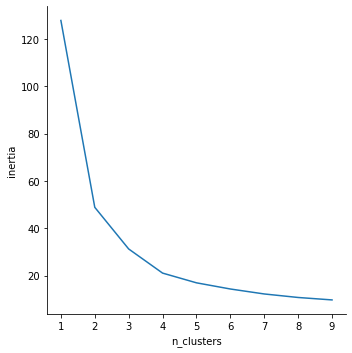

In [10]:
explore.plot_inertia(x)

In [11]:
X_train['cluster'] = kmeans.predict(x)

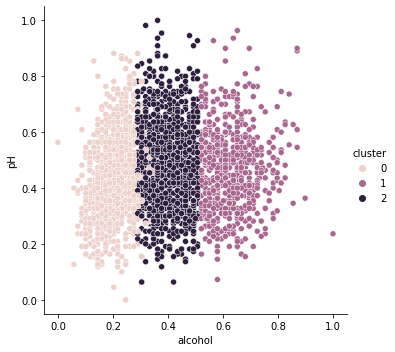

In [12]:
sns.relplot(data=X_train,x='alcohol',y='pH',hue='cluster')

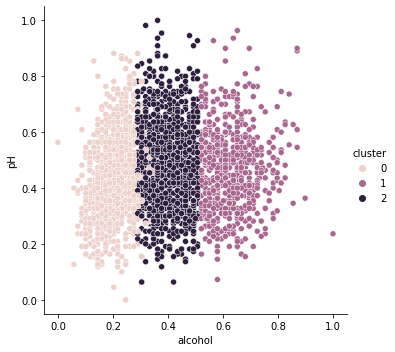

In [13]:
sns.relplot(data=X_train,x='alcohol',y='pH',hue=X_train.cluster)

<AxesSubplot:>

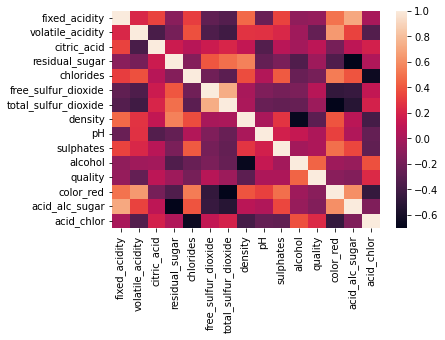

In [14]:
sns.heatmap(train.corr())

In [15]:
train.corr()['quality'].sort_values()

density                -0.295093
volatile_acidity       -0.262734
chlorides              -0.190204
acid_alc_sugar         -0.141140
color_red              -0.114737
fixed_acidity          -0.068270
total_sulfur_dioxide   -0.042280
residual_sugar         -0.036281
sulphates               0.024885
pH                      0.025294
free_sulfur_dioxide     0.062642
citric_acid             0.085020
acid_chlor              0.226925
alcohol                 0.441490
quality                 1.000000
Name: quality, dtype: float64

(<seaborn.axisgrid.FacetGrid at 0x7fd3517d31f0>,
 <seaborn.axisgrid.FacetGrid at 0x7fd351b557c0>)

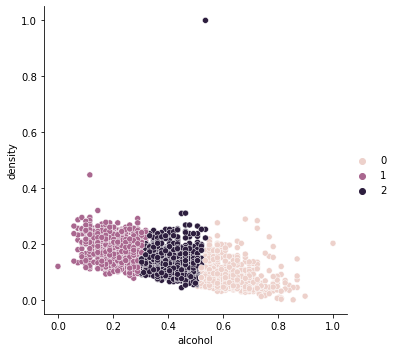

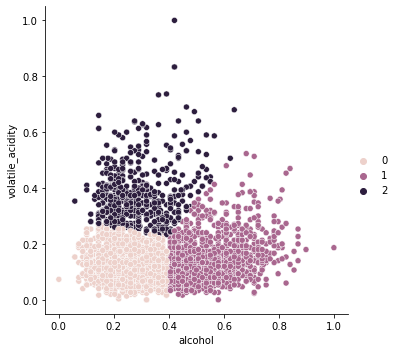

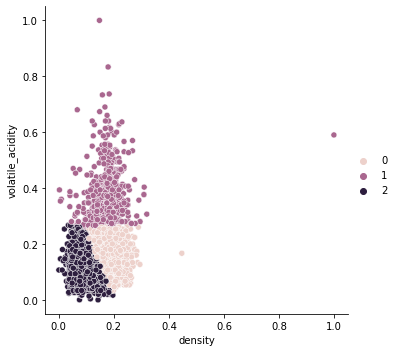

In [16]:
explore.plot_clusters(X_train_s,'alcohol','density','volatile_acidity')

In [17]:
X_train_s,X_val_s,X_test= explore.cluster_Xsets(X_train_s,X_val_s,X_test,
                                        ['alcohol','density','volatile_acidity','chlorides'])

In [18]:
X_train_s.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,acid_alc_sugar,acid_chlor,cluster
540,0.239669,0.153333,0.252033,0.141321,0.051495,0.031250,0.389401,0.157895,0.672727,0.173410,0.492754,0.0,0.160992,0.270808,1
72,0.181818,0.126667,0.227642,0.062980,0.089701,0.104167,0.449309,0.179102,0.881818,0.265896,0.289855,0.0,0.232452,0.143777,0
1389,0.355372,0.073333,0.325203,0.003072,0.046512,0.250000,0.400922,0.105842,0.309091,0.052023,0.289855,0.0,0.488712,0.354172,0
3657,0.157025,0.046667,0.382114,0.164363,0.043189,0.166667,0.281106,0.143628,0.281818,0.052023,0.362319,0.0,0.121198,0.266904,0
860,0.355372,0.126667,0.284553,0.015361,0.034884,0.128472,0.223502,0.104878,0.454545,0.219653,0.347826,0.0,0.433378,0.443864,0


The proportion of acid to (alcohol + sugar) affects quality   
The proportion of acid to chlorides affects quality

In [19]:
# Recursive feature elimination results
explore.rfe(X_train_s,y_train,5)

Index(['volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'alcohol'],
      dtype='object')

In [20]:
def establish_baseline(y_train,y_val):
    '''
    Establishes a baseline RMSE and returns y_train and y_val with the baseline RMSE
    '''
    # Establish baseline predictions 
    y_train['baseline'] = round(y_train.quality.mean(),1)
    # Evaluate baseline on validate test
    y_val['baseline'] = round(y_train.quality.mean(),1)
    return y_train, y_val

In [21]:
y_train,y_val=establish_baseline(y_train,y_val)

In [22]:
def transform_poly(X_train,X_val,X_test):
    # Transform our X_train and X_val set into polynomials of range 2-3
    pf2 = PolynomialFeatures(degree=2)
    X_train_pf2 = pf2.fit_transform(X_train)
    X_val_pf2 = pf2.fit_transform(X_val)
    X_test_pf2 = pf2.fit_transform(X_test)

    pf3 = PolynomialFeatures(degree=3)
    X_train_pf3 = pf3.fit_transform(X_train)
    X_val_pf3 = pf3.fit_transform(X_val)
    X_test_pf3 = pf3.fit_transform(X_test)
    
    return X_train_pf2,X_val_pf2,X_test_pf2,X_train_pf3,X_val_pf3,X_test_pf3

In [28]:
model(LinearRegression(),'lm',X_train,X_val,y_train,y_val,'quality')

(0.7303958798660272, 0.737698256707116, 'lm')

In [30]:
def model(ml_model,mod_name,X_train,X_val,y_train,y_val,target): #Create model function calculate rmse on train and validate
    '''
    ml_model: ml model
    mod_name: name of the model
    X_train: X dataset
    X_val: X dataset
    y_train: 
    y_val
    target = dependent variable
    '''
    model = ml_model
    model.fit(X_train,y_train[target])
    pred = model.predict(X_train).round(1)
    rmse_train =explore.calc_rmse(y_train[target],pred)
    pred = model.predict(X_val).round(1)
    rmse_validate = explore.calc_rmse(y_val[target],pred)
    
    return rmse_train,rmse_validate, mod_name

In [24]:
def model_test(ml_model,mod_name,X_test): #Create a function to check rmse on test set
    model = ml_model
    model.fit(X_train_pf3,y_train.quality)
    pred = model.predict(X_test).round(1)
    rmse_test =calc_rmse(y_test.quality,pred)
    
    return rmse_test

In [57]:
# y_train[target], y_train.baseline, X_train, X_val
def run_models(X_train,X_val,X_test,y_train,y_val,target): 
    y_train, y_val = establish_baseline(y_train,y_val)
    
    
    # Create a dict to store rmse values from our models
    mod = ['baseline']
    rmse = [explore.calc_rmse(y_train[target],y_train.baseline)]
    rmse_val = [explore.calc_rmse(y_val[target],y_val.baseline)]

    # Create all of our models
    models= [LinearRegression(),LassoLars(max_iter=1000, alpha=.1),TweedieRegressor(power=0),TweedieRegressor(power=1)]
    mod_name = ['lm','lass','tweedie0','tweedie1']
    add_pf = ['_pf2','_pf3']

    for m,n in zip(models,mod_name): #Creates models off our reg X_train/val sets
        a,b,c = model(m,n,X_train,X_val,y_train,y_val,target)
        mod.append(c) # Append values to our lists
        rmse.append(a)
        rmse_val.append(b)
    
    X_train_pf2,X_val_pf2,X_test_pf2,X_train_pf3,X_val_pf3,X_test_pf3 = transform_poly(X_train,X_val,X_test)
   
    pfx = [X_train_pf2,X_train_pf3] #Creates models off of our pf2/pf3 X sets
    pfy = [X_val_pf2,X_val_pf3]


    for x,y,na in zip(pfx,pfy,add_pf):
        for m,n in zip(models,mod_name):
            name = n+na
            a,b,c = model(m,name,x,y,y_train,y_val,target) # Returns rmse_train, rmse_validate, mod_name
            mod.append(c) # Append mod_name
            rmse.append(a) # Append rmse_train
            rmse_val.append(b) #Append rmse_validate


    return pd.DataFrame({'model':mod,'rmse_train':rmse,'rmse_val':rmse_val}) # Create df out of listsb

In [69]:
run_models(X_train_s,X_val_s,X_test_s,y_train,y_val,'quality')

,model,rmse_train,rmse_val
0,baseline,0.867727,0.883757
1,lm,0.730396,0.737698
2,lass,0.867727,0.883757
3,tweedie0,0.866233,0.881440
4,tweedie1,0.833852,0.847825
5,lm_pf2,0.675369,0.704755
6,lass_pf2,0.867727,0.883757
7,tweedie0_pf2,0.844121,0.859114
8,tweedie1_pf2,0.803060,0.812924
9,lm_pf3,0.569324,0.898685


In [ ]:
X_train.head()

In [72]:
df_red = df[df.color_red==1]
df_white = df[df.color_red==0]

In [73]:
train_red, X_train_red, y_train_red, X_val_red, y_val_red, X_test_red, y_test_red\
    = explore.split_data(df_red, 'quality')

X_train_red, X_val_red, X_test_red = explore.scale_minmax(X_train_red, X_val_red, X_test_red)

In [78]:
# Create function to drop infinites
def drop_infinite(X_train,X_val,X_test,y_train,y_val,y_test):
    
    ind = X_train[X_train.chlorides==0].index
    X_train = X_train.drop(ind)
    y_train = y_train.drop(ind)
    
    ind = X_val[X_val.chlorides==0].index
    X_val = X_val.drop(ind)
    y_val = y_val.drop(ind)
    
    ind = X_test[X_test.chlorides==0].index
    X_test = X_test.drop(ind)
    y_test = y_test.drop(ind)
    
    return X_train,X_val,X_test,y_train,y_val,y_test

In [79]:
X_train_red,X_val_red,X_test_red,y_train_red,y_val_red,y_test_red = drop_infinite(X_train_red,X_val_red,X_test_red,y_train_red,y_val_red,y_test_red)




In [80]:
run_models(X_train_red,X_val_red,X_test_red,y_train_red,y_val_red,'quality')

,model,rmse_train,rmse_val
0,baseline,0.807080,0.798175
1,lm,0.640793,0.665187
2,lass,0.807080,0.798175
3,tweedie0,0.792652,0.785082
4,tweedie1,0.758188,0.756173
5,lm_pf2,0.581460,0.687026
6,lass_pf2,0.807080,0.798175
7,tweedie0_pf2,0.783666,0.778955
8,tweedie1_pf2,0.724349,0.725808
9,lm_pf3,0.421935,11.270717


In [81]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,acid_alc_sugar,acid_chlor
540,6.7,0.31,0.31,9.9,0.040,10.0,175.0,0.99530,3.46,0.55,11.4,4,0,0.229108,61.000000
72,6.0,0.27,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5,0,0.295045,34.656085
1389,8.1,0.19,0.40,0.9,0.037,73.0,180.0,0.99260,3.06,0.34,10.0,6,0,0.531498,78.288288
3657,5.7,0.15,0.47,11.4,0.035,49.0,128.0,0.99456,3.03,0.34,10.5,8,0,0.192390,60.190476
860,8.1,0.27,0.35,1.7,0.030,38.0,103.0,0.99255,3.22,0.63,10.4,8,0,0.480441,96.888889


In [83]:
X_train.density.describe()

count    3637.000000
mean        0.147130
std         0.058390
min         0.000000
25%         0.101986
50%         0.150183
75%         0.190476
max         1.000000
Name: density, dtype: float64